#Netflix Recommendation System Works

Netflix is a subscription service model that offers personalized recommendations, to help us find shows and movies of interest to you. To do this they have created a proprietary, complex recommendations system. 
Whenever we access the Netflix service, the recommendations system  of netflix strives to help user find a show or movie to enjoy with minimal effort. they  estimate the likelihood that the user  will watch a particular title in their catalog based on a number of factors including:

Their interactions with their services (such as our viewing history and how you rated other titles),

other members with similar tastes and preferences on  their service, and

information about the titles, such as their genre, categories, actors, release year, etc.

When the user create their Netflix account, or add a new profile in the  account, they ask you to choose a few titles that you like. The Recommendation System use these titles to “jump start” your recommendations. Choosing a few titles the user  like is optional. If the user choose to forego this step then we will start the user off with a diverse and popular set of titles to get user going.

Once the user start watching titles on the service, this will “supercede” any initial preferences you provided us, and as the user continue to watch over time, the titles you watched more recently will outweight titles you watched in the past in terms of driving the recommendations system.

In [1]:
#importing the required libraries:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/DATA SCIENTIST/machine learning/Datasets/netflixData.csv")

In [3]:
print(data.head(5))

                                Show Id                          Title  \
0  cc1b6ed9-cf9e-4057-8303-34577fb54477                       (Un)Well   
1  e2ef4e91-fb25-42ab-b485-be8e3b23dedb                         #Alive   
2  b01b73b7-81f6-47a7-86d8-acb63080d525  #AnneFrank - Parallel Stories   
3  b6611af0-f53c-4a08-9ffa-9716dc57eb9c                       #blackAF   
4  7f2d4170-bab8-4d75-adc2-197f7124c070               #cats_the_mewvie   

                                         Description  \
0  This docuseries takes a deep dive into the luc...   
1  As a grisly virus rampages a city, a lone man ...   
2  Through her diary, Anne Frank's story is retol...   
3  Kenya Barris and his family navigate relations...   
4  This pawesome documentary explores how our fel...   

                      Director  \
0                          NaN   
1                       Cho Il   
2  Sabina Fedeli, Anna Migotto   
3                          NaN   
4             Michael Margolis   

             

In [4]:
data.shape

(5967, 13)

In [5]:
#lets check the missing value in the datatset
data.isnull().sum()

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

so the columns Director,Cast,Production Country,Imdb Score ,Date Added ,have null values.Instead of cleaning the whole dataset we will focus on those column which we need to build the Netflix recommendation system.let’s select the columns that we can use to build a Netflix recommendation system:

In [6]:
data=data[['Title','Description','Content Type','Genres']]
data.head(5)

,Title,Description,Content Type,Genres
0,(Un)Well,This docuseries takes a deep dive into the luc...,TV Show,Reality TV
1,#Alive,"As a grisly virus rampages a city, a lone man ...",Movie,"Horror Movies, International Movies, Thrillers"
2,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...",Movie,"Documentaries, International Movies"
3,#blackAF,Kenya Barris and his family navigate relations...,TV Show,TV Comedies
4,#cats_the_mewvie,This pawesome documentary explores how our fel...,Movie,"Documentaries, International Movies"


let's dive into the data and gets some insight .As the name suggests:

1)The title column contains the titles of movies and TV shows on Netflix

2)Description column describes the plot of the TV shows and movies

3)The Content Type column tells us if it’s a movie or a TV show

4)The Genre column contains all the genres of the TV show or the movie

Now let’s drop the rows containing null values and move further:

In [7]:
#lets check the null values in the updated data
data.isnull().sum()
#so there is no null values.

Title           0
Description     0
Content Type    0
Genres          0
dtype: int64

In [8]:
data['Title'].head(10)

0                         (Un)Well
1                           #Alive
2    #AnneFrank - Parallel Stories
3                         #blackAF
4                 #cats_the_mewvie
5                #FriendButMarried
6              #FriendButMarried 2
7                     #realityhigh
8                        #Rucker50
9                          #Selfie
Name: Title, dtype: object

In [9]:
data['Title'].unique()

array(['(Un)Well', '#Alive', '#AnneFrank - Parallel Stories', ..., '海的儿子',
       '반드시 잡는다', '최강전사 미니특공대 : 영웅의 탄생'], dtype=object)

well the column 'Title' contains  # ,(,) etc and it needs some preparation before we move on with  building 
our model.For this we need to
import nltk(it is the natural language toolkit ,It is a platform used for building python programs that work with human language data for applying in statistical natural language processing(nlp) .It contains text processing   libraries for tokenization,parsing,classification,stemming,tagging and semantic reasoning.
Regular expression or (re) specifies a set of strings that   matches it.The module check if a particular string,  which comes down to the samething.

re is a python module use to work with the RegEx.
Regular Expressionis a sequence of character that defines a search pattern.
I will upload another jupiter notebook dedicated to Regular Expression.

In [10]:
import nltk
import re
nltk.download('stopwords')#from nltk we will download stopwords
stemmer=nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]',"",text)# backlash is used to escape various characters including matacharacter.
    text=re.sub('http?://\s+|www\.\S','',text)
    text=re.sub('<.?>+',"",text)
    text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text=re.sub('\n', '', text)
    text=re.sub('\w*\d\w*', '', text)
    text=[word for word in text.split(' ') if word not in stopword]
    text=''.join(text)
    return text
data['Title']=data['Title'].apply(clean)# here applying clean() to clean the title
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
data['Title'].sample(10)
#wecan clearly see that our column 'Title' is compltely clean

938                  charité
1698                  freaks
5762               westcoast
2040             hiscoregirl
889     carmastersrustriches
4849                 girlgun
2269                 inferno
233                airstrike
3711                 players
5742          summondarkness
Name: Title, dtype: object

In [12]:
genres_count=data['Genres'].value_counts()

<AxesSubplot:ylabel='Genres'>

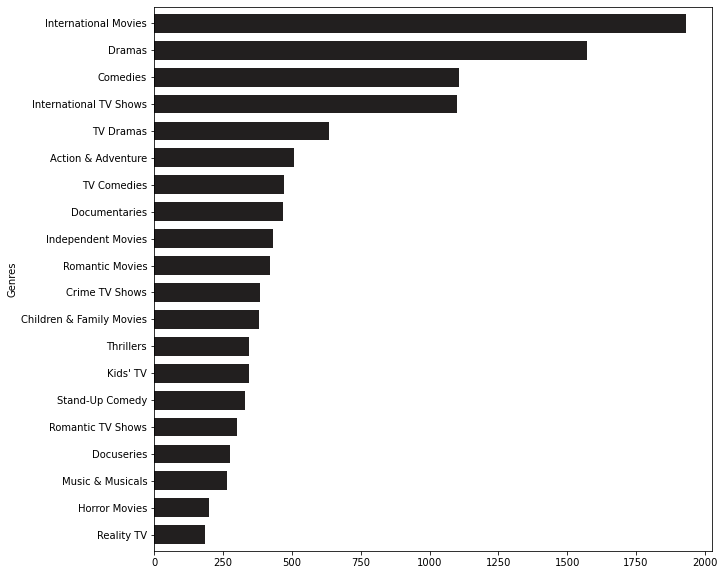

In [13]:
genres = ", ".join(data['Genres']).split(", ")
genres

from collections import Counter
cnt = Counter()
for genre in genres:
    cnt[genre] += 1

topGenres = cnt.most_common(20)
df_topGenres = pd.DataFrame (topGenres, columns = ['Genres','Genres Count'])
df_topGenres.sort_values(ascending=True, by='Genres Count', inplace=True)
df_topGenres.plot.barh(x='Genres',color=["#221f1f","#e50914"],width=0.7,legend=False, figsize=(10, 10))

Now I will use the Genres column as the feature to recommend similar content to the user. 
I will use the concept of cosine similarity here .

what is cosine similarity?

Cosine similarity is a method used in building machine learning applications such as recommender systems. 
It is a technique to find the similarities between the two documents.It does this by calculating the similarity
score between the vectors, which is done by finding the angles between them. The range of similarities is between 0 and 1.
If the value of the similarity score between two vectors is 1, it means that there is a greater similarity between the two vectors.
On the other hand, if the value of the similarity score between two vectors is 0, it means that there is no similarity between the two vectors. When the similarity score is one, the angle between two vectors is 0 and when the similarity score is 0, the angle between two vectors is 90 degrees.

In [14]:
feature = data["Genres"].tolist()
tfidf = text.TfidfVectorizer(input=feature, stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

Team Frequency Inverse Document Frequency(TFIDF).It works by proportionally increasing the number of times a word
appears in the document but it is counterbalance by the number of documents in which it is present.It only focus on the frequency of words present in the corpus but also provides the importance of the words.


will set the Title column as an index so that we can 
find similar content by giving the title of the movie or TV show as an input:

In [15]:
indices = pd.Series(data.index, 
                    index=data['Title']).drop_duplicates()

writing a function to recommend Movies and TV shows on Netflix:

In [16]:
def netFlix_recommendation(title, similarity = similarity):
    index = indices[title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:10]
    movieindices = [i[0] for i in similarity_scores]
    return data['Title'].iloc[movieindices]



In [17]:
print(netFlix_recommendation('congo'))

1082               congo
4877        hatefuleight
5608             unknown
44              dayskill
65               bullets
183            abduction
232          airforceone
323     americanassassin
330      americanoutlaws
367          angelfallen
Name: Title, dtype: object
